In [155]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import minkowski_tools as mt

In [162]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [174]:
connections = mt.get_connections(points, pval=1.1, radius=.1)
short_path = mt.shortest_path(connections)

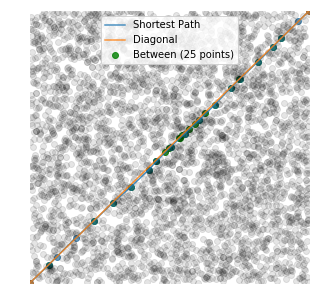

In [175]:
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
fig, ax = plt.subplots(figsize=(5, 5))
betweens = mt.points_between(points, short_path_points)
ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
mt.plot_path_points(ax, paths=[short_path_points, np.array([[0, 1], [0, 1]])], path_labels=['Shortest Path', 'Diagonal'])
ax.scatter(*points, c='k', alpha=0.1)

(array([1., 0., 1., 2., 4., 2., 4., 2., 2., 1.]),
 array([0.72583587, 0.73717828, 0.74852068, 0.75986308, 0.77120548,
        0.78254789, 0.79389029, 0.80523269, 0.81657509, 0.82791749,
        0.8392599 ]),
 <a list of 10 Patch objects>)

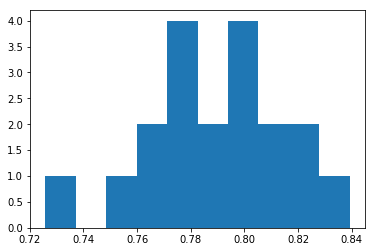

In [181]:
plt.hist(mt.path_angles(short_path_points))

In [182]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 


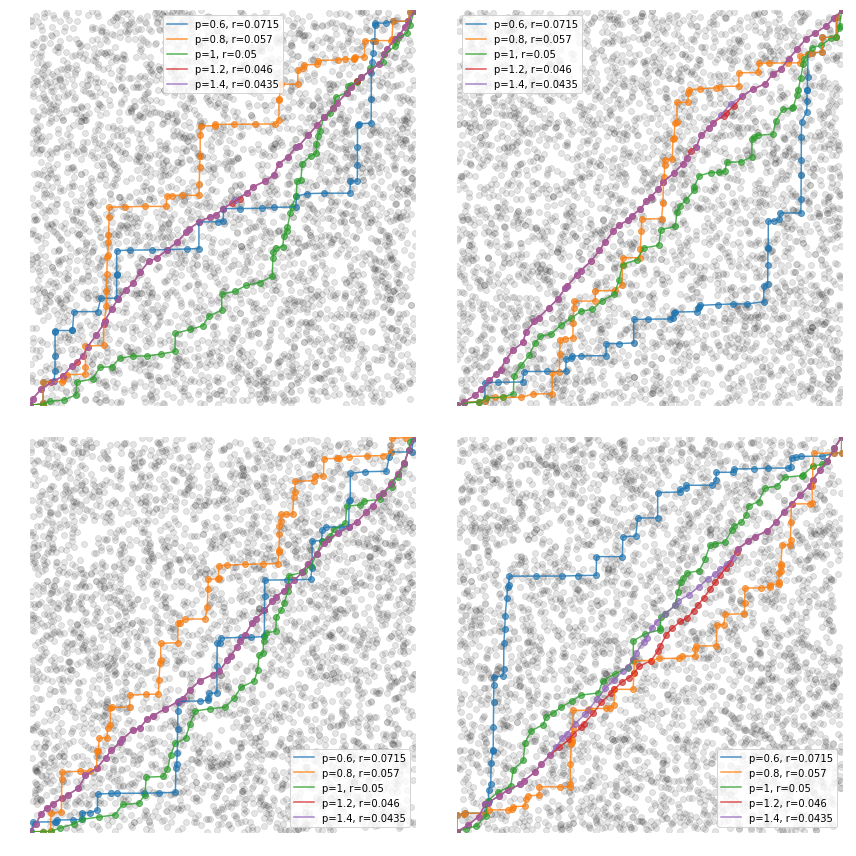

In [201]:
n=4000

fig, axes = plt.subplots(2, 2, figsize=(12,12))
ps, rs = [0.8, 1, 1.2], [0.2, 0.1, 0.1]

ps = [0.6, 0.8, 1, 1.2, 1.4]
r_rel = np.array([1.43, 1.14, 1, 0.92, 0.87])
rs = r_rel/20

ensemble_points = [np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1) for count in range(4)]

ensemble_short_paths = []

for points, ax in zip(ensemble_points, axes.flatten()):

    path_labels = ['p={}, r={:.3}'.format(p, r) for p, r in zip(ps, rs)]
    
    print('Getting connections', end='')
    diff_connections = [mt.get_connections(points, pval=p, radius=r) for p, r,label in zip(ps, rs, path_labels) if not print(': '+ label, end=' ')]
    print()
    print('Getting shortest paths', end='')
    short_paths = [mt.shortest_path(connections) for connections, label in zip(diff_connections, path_labels) if not print(': '+ label, end=' ')]
    print()    
    
    short_path_points = {p:np.array([points[:, u] for u in path]).transpose() for p, path in zip(ps, short_paths)}
    ensemble_short_paths.append(short_path_points)
    
    mt.plot_points_simple(ax, points, short_paths, path_labels)

plt.tight_layout()

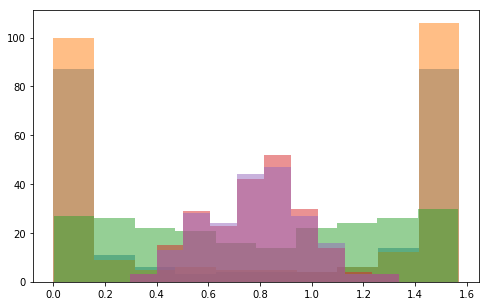

In [208]:
fig, ax = plt.subplots(figsize=(8, 5))

for p, r in zip(ps, rs):
    flat_angles = (np.concatenate([mt.path_angles(all_paths[p]) for all_paths in ensemble_short_paths], axis=0))
    ax.hist(flat_angles, label='p={}, r={:.3}'.format(p, r), alpha=0.5)
    

In [222]:
n=8000
n_systems = 10

ps, rs = [0.8, 1, 1.2], [0.2, 0.1, 0.1]

ps = [0.6, 0.8, 1, 1.2, 1.4]
r_rel = np.array([1.43, 1.14, 1, 0.92, 0.87])
rs = r_rel/30

ensemble_points = [np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1) for count in range(n_systems)]

ensemble_short_paths = []

for points, i in zip(ensemble_points, range(n_systems)):
    print(i)
    print('Getting connections', end='')
    diff_connections = [mt.get_connections(points, pval=p, radius=r) for p, r,label in zip(ps, rs, path_labels) if not print(': '+ label, end=' ')]
    print()
    print('Getting shortest paths', end='')
    short_paths = [mt.shortest_path(connections) for connections, label in zip(diff_connections, path_labels) if not print(': '+ label, end=' ')]
    print()    
    
    short_path_points = {p:np.array([points[:, u] for u in path]).transpose() for p, path in zip(ps, short_paths)}
    ensemble_short_paths.append(short_path_points)

0
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
1
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
2
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
3
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
4
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : 

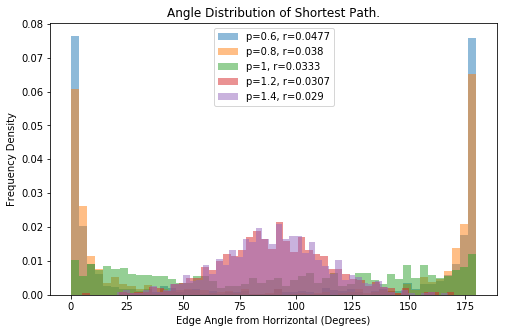

In [236]:
fig, ax = plt.subplots(figsize=(8, 5))

for p, r in zip(ps, rs):
    flat_angles = (np.concatenate([mt.path_angles(all_paths[p]) for all_paths in ensemble_short_paths], axis=0))
    ax.hist(flat_angles*360/np.pi, label='p={}, r={:.3}'.format(p, r), alpha=0.5, bins=50, normed=1)

ax.set(title='Angle Distribution of Shortest Path.', xlabel='Edge Angle from Horrizontal (Degrees)', ylabel='Frequency Density')
ax.legend()
plt.savefig('img/ang_dist_10_8e3_30.pdf')

In [324]:
def bi_djikstre(connection_mat):
    """
    Returns dictionaries with;
    -shortest distances to the nodes from the source, [0, 0] (labelled by index).
    -previous node for shortest path from the source, [0, 0] (labelled by index).
    Untested for disconnected graphs (from the source, [0, 0])
    
    Developed to become a bidirectional search.
    """
    n = connection_mat.shape[0]
    
    dist_f, prev_f = {}, {}
    Q_f  = list(range(n))
    
    dist_b, prev_b = {}, {}
    Q_b  = list(range(n))
    
    for i in Q_f:
        dist_f[i] = np.inf
    dist_f[n-2] = 0.0
    
    for i in Q_b:
        dist_b[i] = np.inf
    dist_b[n-1] = 0.0
    
    done_f = []
    done_b = []
    
    while not (set(done_b) & set(done_f)):
        
        for dist, prev, Q, done in zip([dist_b, dist_f], [prev_b, prev_f], [Q_b, Q_f], [done_b, done_f]):

            min_dist = min([dist[key] for key in Q])
            u = [key for key in Q if dist[key] == min_dist][0]
            Q.remove(u)

            for v in np.nonzero(connection_mat[:, u])[0]:

                alt = dist[u]+connection_mat[v, u]

                if alt < dist[v]:
                    dist[v] = alt
                    prev[v] = u
                    
            done.append(u)
                
    meeting_point = list(set(done_b) & set(done_f))[0]

    path_b=[]
    path_f=[]

    path_f.append(u)
    
    u = meeting_point
    
    while u != n-2:
        u = prev_b[u]
        path.append(u)
        
    u = meeting_point
        
    while u != n-1:
        u = prev[u]
        path.append(u)
    
    return path_f[::-1].extend(path_b)

In [325]:
bi_djikstre(connections)

KeyError: 2

In [292]:
n=100
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)
connections = mt.get_connections(points, pval=2, radius=.2)

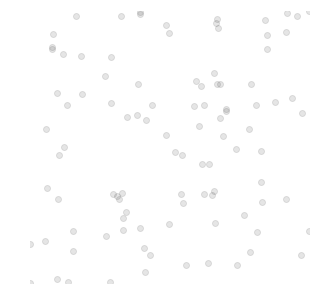

In [302]:
fig, ax = plt.subplots(figsize=(5, 5))
mt.plot_points_simple(ax, points)

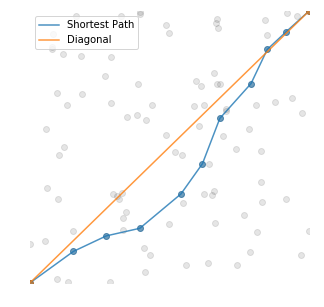

In [304]:
short_path = mt.shortest_path(connections)
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
fig, ax = plt.subplots(figsize=(5, 5))
betweens = mt.points_between(points, short_path_points)
mt.plot_path_points(ax, paths=[short_path_points, np.array([[0, 1], [0, 1]])], path_labels=['Shortest Path', 'Diagonal'])
ax.scatter(*points, c='k', alpha=0.1)

In [305]:
short_path

[99, 68, 0, 43, 31, 39, 73, 70, 22, 2, 98]

In [265]:
(b and a)

[1, 2, 3]

In [287]:
if (set(a) & set(b)):
    print(set(a) & set(b))

{3}


In [290]:
setab = set(a) & set(b)
list(setab)[0]

3